# Working on cosmetics

In [6]:
import os
import argparse
import yaml
from glob import glob
import pandas as pd
from jinja2 import Environment, FileSystemLoader

from commish.league import League
from commish import plotting

os.chdir("../")

Setup season 18 league.

In [20]:
with open(os.path.join("season-configs", "17.yml")) as f:
    season_config = yaml.safe_load(f)

season = season_config["season"]
league = League(
    season=season,
    queens_file=season_config["queens"],
    contestant_file=season_config["contestants"],
    rank_score_file=season_config["rank_scores"],
    event_scores_file=season_config["event_scores"],
)

episodes = sorted(glob(os.path.join(season_config["episodes_dir"], "*.json")))
for episode_file in episodes:
    league.add_episode(episode_file)

Adding episode 1...
Adding episode 2...
Adding episode 3...
Adding episode 4...
Adding episode 5...
Adding episode 6...
Adding episode 7...
Adding episode 8...
Adding episode 9...
Adding episode 10...
Adding episode 11...
Adding episode 12...
Adding episode 13...
Adding episode 14...
Adding episode 15...
Adding episode 16...


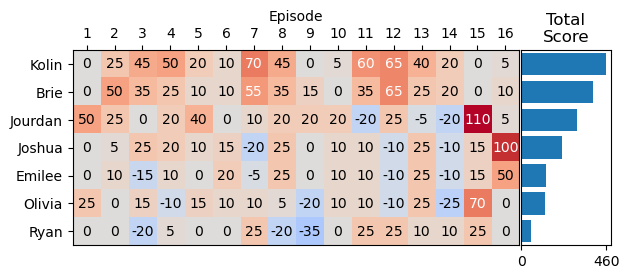

In [21]:
fig = plotting.plot_weekly_scores(league)

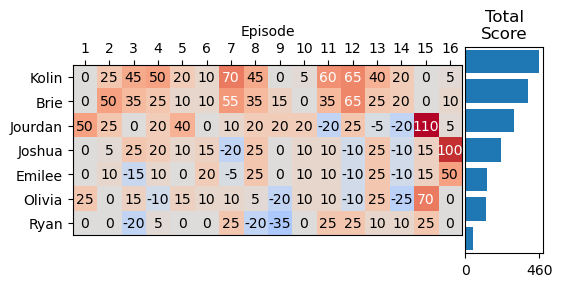

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec
import numpy as np

# def plot_heatmap_with_bar(data, bar_values):
scores = league.get_weekly_scores()
totals = scores.sum(axis=1).sort_values()
scores = scores.loc[totals.index[::-1]]

n_contestants, n_episodes = scores.shape

# ---- Physical layout (in inches) ----
col_width = 0.24  # per heatmap column
heatmap_width = n_episodes * col_width
bar_width = 1.0 # fixed bar plot width
ytick_space = 1.15  # room for row tick labels
panel_gap = 0.08

total_width = ytick_space + heatmap_width + panel_gap + bar_width

# The heatmap should have equal aspect ratio
row_height = col_width  # square cells
above = 0.5  # space above first row for title
below = 0.5  # space below last row for x axis labels
total_height = n_contestants * row_height + above + below

# ---- Figure & GridSpec ----
fig, (ax_hm, ax_bar) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(total_width, total_height),
    gridspec_kw={
        "width_ratios": [heatmap_width + ytick_space, bar_width],
        "wspace": panel_gap / total_width,
    },
)

fig, ax_hm = plt.subplots(figsize=(total_width, total_height))
# ---- Heatmap ----
heatmap = ax_hm.imshow(
    scores,
    aspect="equal",
    cmap="coolwarm",
    norm=mcolors.CenteredNorm(),
)
plotting.set_xticks_above(ax_hm)
ax_hm.set_xlabel("Episode")
ax_hm.set_xticks(range(len(scores.columns)), labels=scores.columns)
ax_hm.set_yticks(range(len(scores.index)), labels=scores.index)
plotting.annotate_heatmap(ax_hm, scores)

# ---- Bar plot ----
divider = make_axes_locatable(ax_hm)

ax_bar = divider.append_axes(
    "right",
    size="1in",  # exact physical width
    pad="0.08in",
)

y = np.arange(n_contestants)
ax_bar.barh(y, totals)
ax_bar.set_xticks([0, max(totals)])
ax_bar.set_yticks([])
ax_bar.set_ylim(ax_hm.get_ylim())
ax_bar.invert_yaxis()
ax_bar.set_title("Total\nScore")

# Lock vertical geometry
# ax_bar.sharey(ax_hm)
# ax_bar.set_ylim(reversed(ax_hm.get_ylim()))
# ax_bar.autoscale(False)


# Match the physical axis heights
ax_bar.set_box_aspect(ax_hm.get_box_aspect())

# return fig, ax_hm, ax_bar